<a href="https://colab.research.google.com/github/yurahuna/graphillion_tutorial/blob/master/ja/05_graphillion_and_zdd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inside Graphillion

To understand why Graphillion can solve the counting-up sisters problem so efficiently, it is essential to understand the internal structure of Graphillion. ZDDs allow graph sets to be represented in a very small amount of memory. ZDDs also allow for the efficient execution of various operations on graph sets.

The existence of ZDDs is completely hidden from Graphillion, so that users can use ZDDs without being aware of their existence. On the other hand, it is important to understand ZDDs in order to get the most out of Graphillion.

## Zero-suppressed binary decision diagram (ZDD)

First, we show a brief description of ZDDs. A ZDD is a data structure that represents a set of combinations in the form of a graph; Graphillion can represent a set of graphs using another graph called a ZDD.

Consider the set of combinations $\{\{1, 2\}, \{2, 3\}, \{3, 1\}\}$ for three numbers 1, 2, 3. This set can be represented using ZDD as shown in the figure below.

![sample_zdd](https://github.com/nsnmsak/graphillion_tutorial/blob/master/ja/img/05/sample_zdd.png?raw=1)

ZDD is a directed graph consisting of two types of vertices, elliptical and rectangular, and dashed and solid arrows (directed edges). The numbers on the vertices of an ellipse represent the elements to which that vertex corresponds: the three combinations $\{1, 2\}, \{2, 3\}, \{3, 1\} $ correspond to the three paths from the highest vertex (called the root) of the ZDD to the lowest vertex labeled 1, respectively. For each path, we can obtain the corresponding combination from the path if, when we move from one vertex in the path to the next vertex following solid edges, the element marked on that vertex is included in the combination.

For example, a path that follows the edges from the root to the solid edge, the dashed edge, and the solid edge in that order reaches a terminal vertex marked 1. This path represents the combination $\{1, 3\}$ that contains 1, 3 and does not contain 2.

ZDD represents a set of combinations as a collection of paths in a directed graph. The advantage of this representation is that a set of many combinations can be represented as a small graph.

![saple_zdd_dense](https://github.com/nsnmsak/graphillion_tutorial/blob/master/ja/img/05/sample_zdd_dense.png?raw=1)

The above figure shows a ZDD representing a set of combinations $\{\}, \{1\}, \{2\}, \{3\}, \{1, 2\}, \{2, 3\}, \{1, 3\}, \{1, 2, 3\}$. ZDDs with four vertices can represent a set of eight combinations.

## Graphillion and ZDDs

Let's look at how ZDDs are used in Graphillion. As explained in [previous chapter](04_graphillion_first_step.ipynb), the `GraphSet` class in Graphillion represents a set of graphs. The `GraphSet` object represents a set of graphs as a ZDD.

Since Graphillion does not provide a method to explicitly retrieve ZDDs inside a `GraphSet`, we prepared a function in `tutorial_util.py` to retrieve ZDDs. First, as in the previous section, let's find a `GraphSet` that represents the set of paths connecting the diagonal vertices of a grid graph.

In [1]:
!pip install graphillion
!git clone https://github.com/nsnmsak/graphillion_tutorial
!cp graphillion_tutorial/ja/tutorial_util.py .

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for graphillion: filename=Graphillion-1.5-cp310-cp310-linux_x86_64.whl size=2384563 sha256=6afd0a256d6a2af388f5a8de306e467d9beff27faf7e3f348230f6052a19c84c
  Stored in directory: /root/.cache/pip/wheels/41/52/0c/381fe526c67fcd6febe031338c1338628120ad9dab12b22c45
Successfully built graphillion
Cloning into 'graphillion_tutorial'...
remote: Enumerating objects: 294, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 294 (delta 3), reused 2 (delta 2), pack-reused 288
Receiving objects: 100% (294/294), 6.61 MiB | 29.18 MiB/s, done.
Resolving deltas: 100% (179/179), done.


In [2]:
from graphillion import GraphSet, tutorial
from tutorial_util import draw_zdd, zdd_size, draw_subgraph, draw_universe

First, set up the `universe`. This time, we will set up a small grid graph.

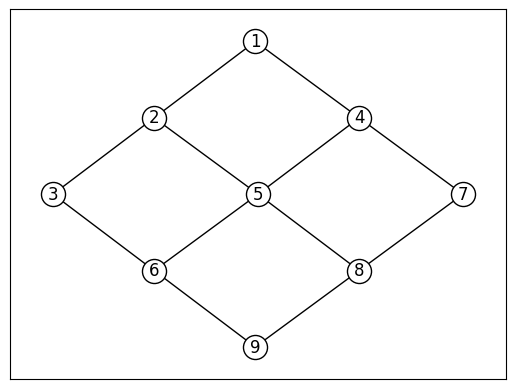

In [3]:
grid = tutorial.grid(2, 2)
GraphSet.set_universe(grid)
draw_universe()

Next, create a `GraphSet` object that represents the set of paths connecting the diagonal vertices.

In [4]:
paths =  GraphSet.paths(1, 9)
len(paths)

12

`paths` is a `GraphSet` object with 12 paths. Now let's look at the ZDDs corresponding to the `paths`.

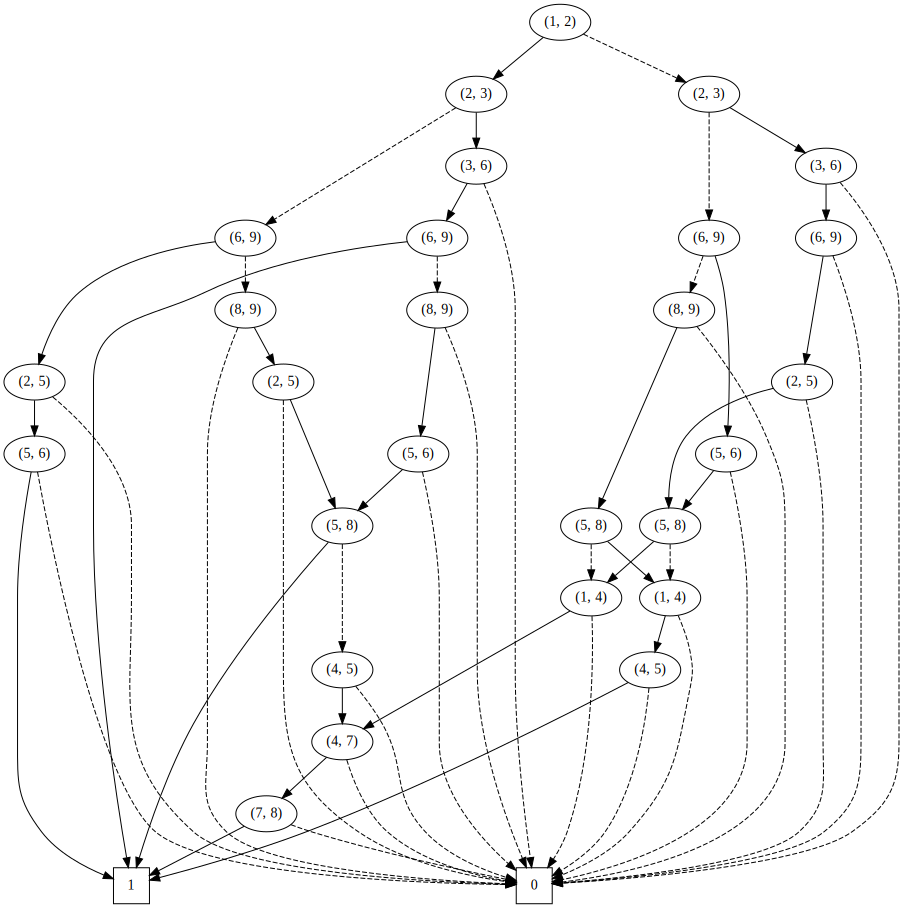

In [5]:
draw_zdd(paths)

`draw_zdd(paths, universe)` is a method to draw ZDDs corresponding to `paths` prepared for this tutorial. The `GraphSet` represents a graph set as a set of edge combinations. Therefore, the labels of the elliptic nodes in the ZDD correspond to the edges in the `universe`.

Looking at the ZDD above, we can see that there are a total of 12 paths from the root to 1-terminal vertex. Each of these paths corresponds to a subgraph in the set of graphs represented by `paths`.

Next, let's look at the size of the ZDD; the number of nodes in the ZDD can be checked using the `zdd_size` method.

In [6]:
zdd_size(paths)

27

You can see that `paths`, which represents a set of 12 paths, can be represented as a ZDD with 27 vertices. In this example, it is difficult to see the merit of using ZDDs as an internal representation.

In the following example, the effect of ZDDs is more pronounced.

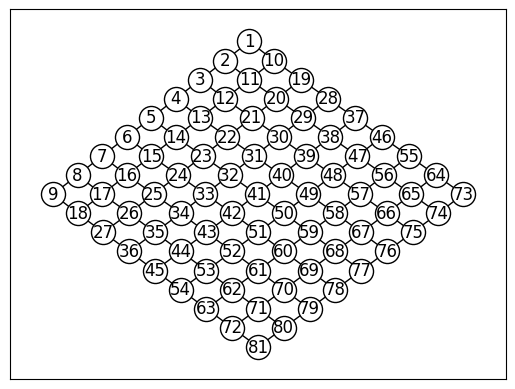

In [7]:
GraphSet.set_universe(tutorial.grid(8, 8))
paths = GraphSet.paths(1, 81)
draw_universe()

In an 8x8 grid graph, the total number of paths increases exponentially.

In [8]:
len(paths)

3266598486981642

The number of ZDD vertices representing `paths` is also increased, but by a much smaller amount than the total number of paths.

In [9]:
zdd_size(paths)

194351

Thus, by using ZDD to represent a graph set consisting of a huge number of subgraphs in a small form, Graphillion is able to solve the counting sister problem very quickly.

Why is ZDD able to represent the solution set of the counting sister problem so small? The reason is that there are many similar subgraphs in the set of subgraphs that are solutions to the counting sister problem. Similar subgraphs can be expressed in the form of a path from the root of ZDD to the 1-terminal vertex, which has many parts in common.

Let's look at the following two paths.

<img src="https://github.com/nsnmsak/graphillion_tutorial/blob/master/ja/img/05/similar_paths.png?raw=1" alt="Example of similar path" style="height: 200px;"/>

These paths `[(1, 2), (2, 3), (3, 6), (6, 9)]` and `[(1, 2), (2, 3), (3, 6), (6, 5), (5, 8), (8, 9)]` share the edges `[(1, 2), (2, 3), (3, 6)]`. If you look closely at the ZDDs representing the `paths` above, you will see that the common edges are represented together.

Thus, ZDDs can represent a small set of graphs by grouping common paths together.

## Advantages of ZDDs

The advantages of using ZDDs go beyond the ability to represent small graph sets; an important feature of ZDDs is the ability to perform a variety of operations in a time proportional to the size of the ZDD. As a typical example, ZDDs are capable of efficiently counting up the number of elements contained in a graph, as in the case of Graphillion, where the number of subgraphs contained in a `gs` can be computed by performing `len(gs)` on a `GraphSet` object `gs`. ZDD is also utilized in this calculation.

The operation to find the graph with the smallest and largest sum of edge weights can also be performed in a computation time proportional to the number of vertices in the ZDD. This feature can be used to solve difficult optimization problems on graphs such as the longest path problem.

Other operations are also possible, such as adding conditions to a set of graphs to create another set of graphs. Almost all of the methods of the `GraphSet` class introduced in the next chapter have corresponding ZDD operations.

Thus, the greatest advantage of ZDD is the ability to compress and represent a set of combinations and then flexibly perform various calculations in a time proportional to the compressed representation.

## Disadvantages of ZDDs
ZDDs are tools that compress and represent a set of graphs and can perform various calculations in a computation time proportional to the size of the ZDD. In other words, when the ZDD itself, which represents a set of graphs, is large, the computation takes a long time. Specifically, the ZDD becomes huge in the following cases and the computation tends to take an unrealistic amount of time.
- The number of `universe` is more than 1000 vertices.
- The `universe` is a dense graph (the number of edges is much larger than the number of vertices).

Another drawback is that it is difficult to predict how much the size of the ZDD will increase or decrease depending on the operations performed on the `GraphSet` object. [Chapter 9](09_graphillion_practical_guide.ipynb) provides guidelines for applying Graphillion to real-world problems.

## Summary of this chapter
This chapter has described ZDDs, the data structures used within Graphillion, which contain the latest research results on ZDDs. If you are interested in the technical details, please refer to the references.

In the following chapters, we will show you several ways to solve problems using Graphillion. First, [next chapter](06_graph_set.ipynb) explains the function of the `GraphSet` class and the flow of problem solving using Graphillion.


## References
- [Donald E. Knuth (Author) The Art of Computer Programming Volume 4A Combinatorial Algorithms Part1](https://www.amazon.co.jp/Art-Computer-Programming-Combinatorial-Algorithms/dp/0201038048) This is the Japanese edition of the famous algorithm textbook. It has the most extensive explanation of ZDDs among the books available in Japanese. The level of difficulty is high.
- [Shin-ichi Minato (ed.) Ultrafast Graph Enumeration Algorithm: A New Approach to Combinatorial Problems](https://www.morikita.co.jp/books/book/2838) (in Japanese): This book contains a detailed explanation of Graphillion and ZDD, and recommended for those who want to master Graphillion.
